## HOMOGENOUS PHANTOM 0.7

In [1]:
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import pandas as pd
import random
import keras
import scipy.io
from scipy import signal

Using TensorFlow backend.


In [2]:
def style_maximizing_table(df):
    g_pallete = seaborn.light_palette("green", as_cmap=True, reverse=True)
    return df.style.background_gradient(cmap=g_pallete)

In [3]:
chunk_size = 650
true_att = .7
dec = 1
FS = 50e6
def standardize(x):
    return (x-np.mean(x))/np.std(x)

def decimate(x, dec):
    if dec != 1:
        x = x[::dec]
    return x

In [4]:
with open('result/args.pkl', 'rb') as f:
    args = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'result/args.pkl'

In [5]:
data = scipy.io.loadmat('/home/pjarosik/data/ac/piston/homogenous/rf_imasonic_uniform.mat')['rf']
data.shape

(8191, 33)

In [6]:
# remove 100 first samples (which looks like they were cropped by ADC)
data = data[200:3500, :]
data.shape

(3300, 33)

In [7]:
# slice the data on multiple parts with given size
# TODO standardize
examples = []
for line in range(data.shape[1]):
    line = decimate(data[:, line], dec)
    i = 0
    while i+chunk_size < line.shape[0]:
        print(i)
        example = line[i:i+chunk_size]
        example = standardize(example)
        i += chunk_size
        examples.append(example)
examples = np.stack(examples, axis=0)
examples.shape

0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600
0
650
1300
1950
2600


(165, 650)

Verify slicing (just to visually check slicing was implemented correctly): 

3 first examples:

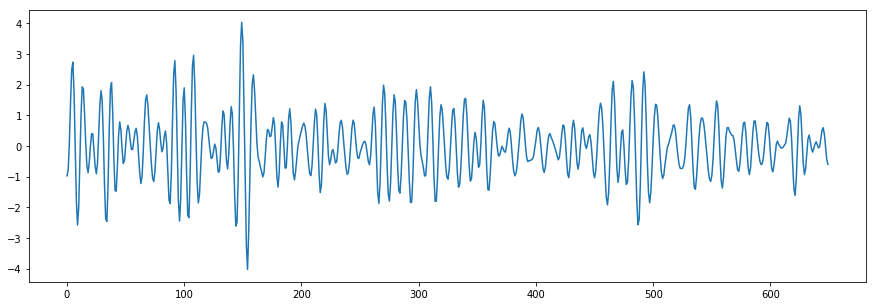

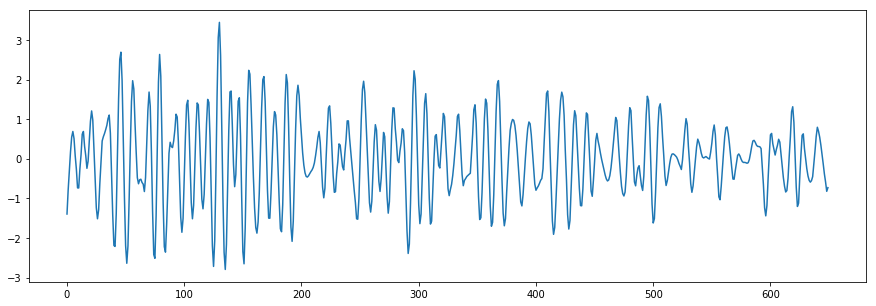

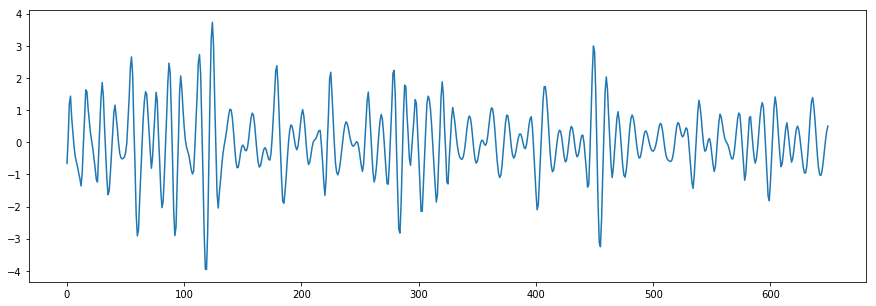

In [8]:
for i in range(3):
    plt.figure(figsize=(15, 5))
    plt.plot(examples[i])
    plt.show()

3 first slices from first line:

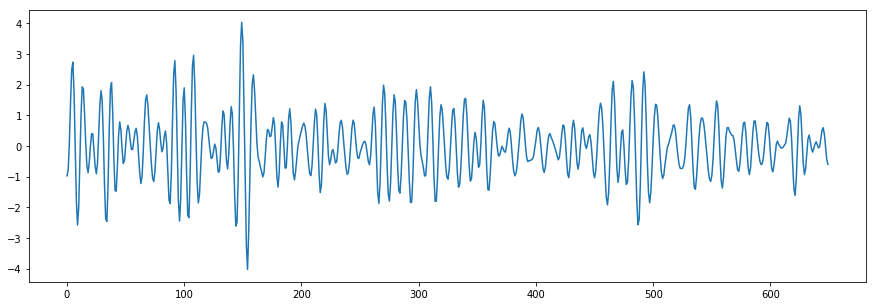

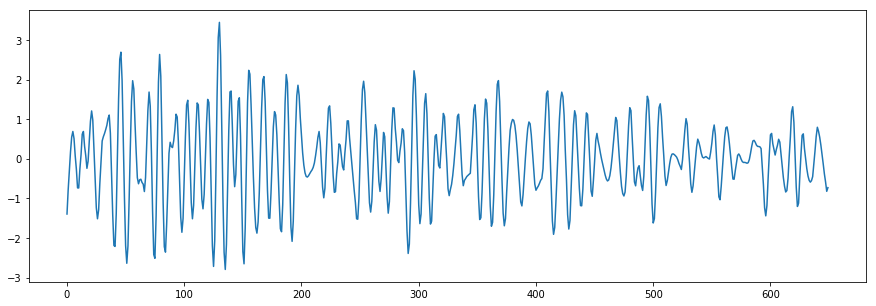

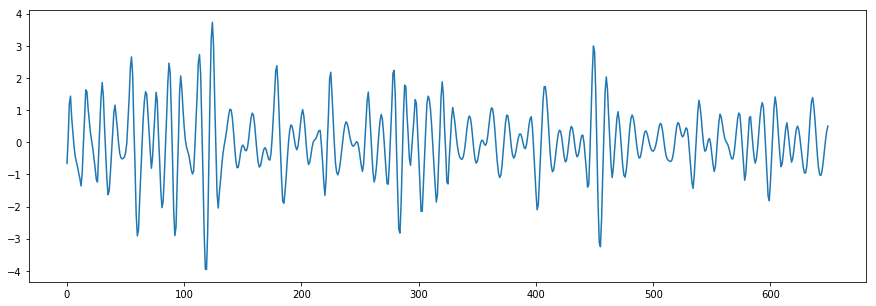

In [9]:
line = decimate(data[:, 0], dec)
for i in range(3):
    plt.figure(figsize=(15, 5))
    plt.plot(standardize(line[i*chunk_size:(i+1)*chunk_size]))
    plt.show()

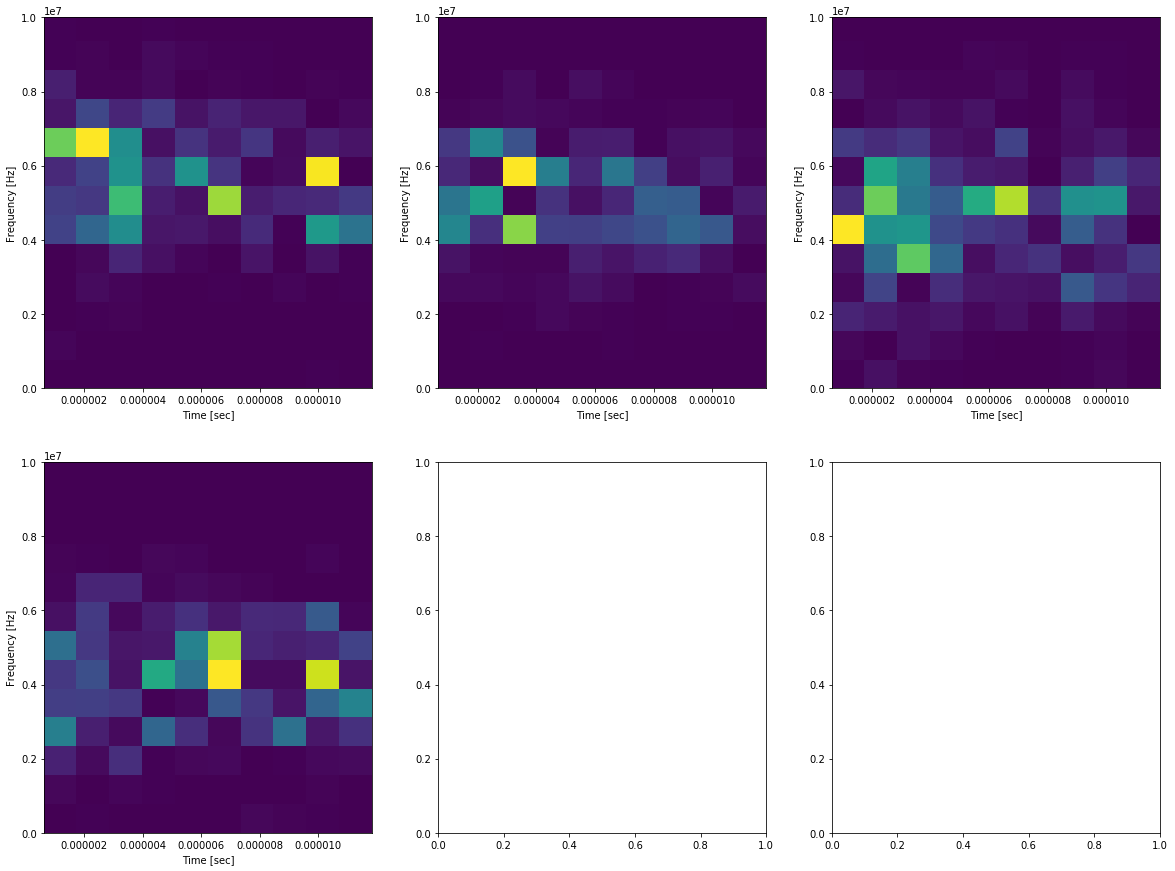

In [10]:
vis_examples = examples[:4]
fig, axes = plt.subplots((vis_examples.shape[0]-1)//3+1, 3)
fig.set_size_inches((20, 15))
for i, chunk in enumerate(vis_examples):
    f, t, Sxx = signal.spectrogram(chunk, fs=FS, nperseg=64)
    ax = axes.flatten()[i]
    ax.pcolormesh(t, f, Sxx)
    ax.set_ylabel('Frequency [Hz]')
    ax.set_ylim([0, 1e7])
    ax.set_xlabel('Time [sec]')
plt.show()

load and test the model

In [11]:
model_id = 0

model = keras.models.load_model('result/model%d.h5' % model_id)
model.summary()

x_test = examples[0:24, :]

predicted_values = model.predict(x_test).squeeze().tolist()
# true_values = y_test
result_df = pd.DataFrame.from_dict({
#     "true" : true_values,
    "predicted" : predicted_values,
#     "diff" : np.abs(np.array(predicted_values)-np.array(true_values))
})
style_maximizing_table(result_df)

OSError: Unable to open file (unable to open file: name = 'result/model0.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
predicted_values = model.predict(examples).squeeze().tolist()
print("Mean: %.4f" % np.mean(np.abs(np.array(predicted_values)-true_att)))
print("Std: %.4f" % np.std(np.abs(np.array(predicted_values)-true_att)))

In [ ]:
predicted_values = model.predict(examples).squeeze().tolist()
print("Mean: %.4f" % np.mean(predicted_values))
print("Std: %.4f" % np.std(predicted_values))

## HOMOGENOUS PHANTOM 0.5

In [12]:
data = scipy.io.loadmat('/home/pjarosik/data/ac/piston/homogenous/rf_fantom05_imasonic_A.mat')['rf']
data.shape

(10018, 130)

In [13]:
# remove 100 first samples (which looks like they were cropped by ADC)
data = data[200:3500, :]
data.shape

(3300, 130)

In [14]:
# slice the data on multiple parts with given size
# TODO standardize
examples = []
for line in range(data.shape[1]):
    line = decimate(data[:, line], dec)
    i = 0
    while i+chunk_size < line.shape[0]:
        example = line[i:i+chunk_size]
        example = standardize(example)
        i += chunk_size
        examples.append(example)
examples = np.stack(examples, axis=0)
examples.shape

(650, 650)

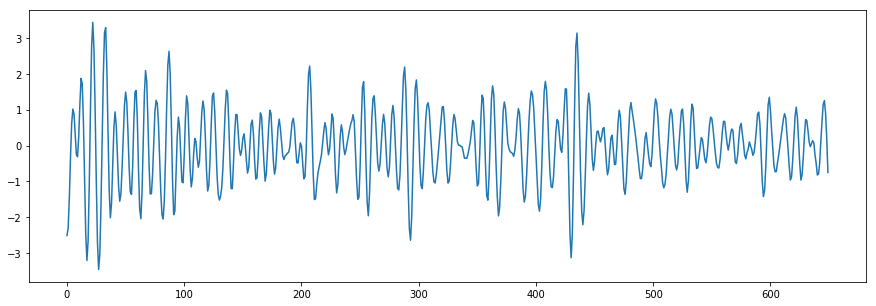

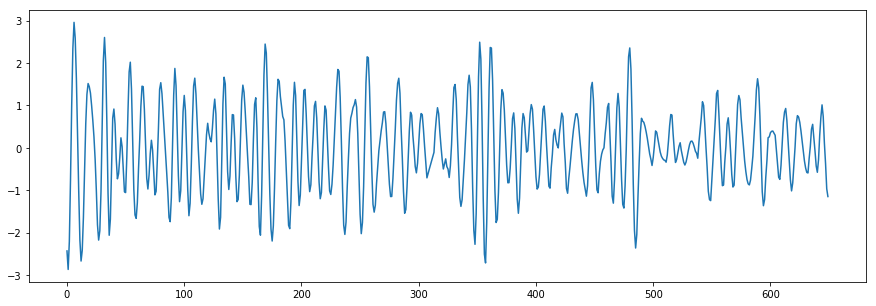

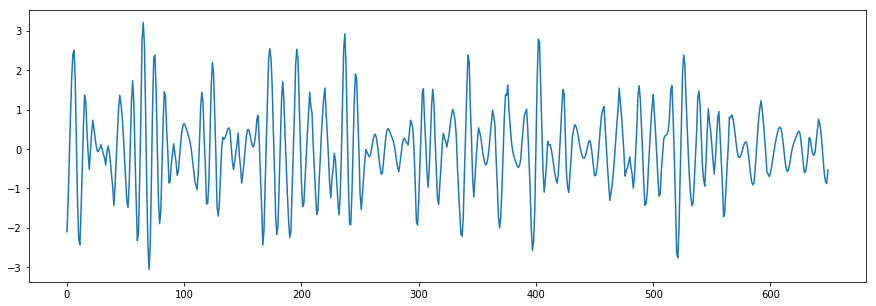

In [15]:
for i in range(3):
    plt.figure(figsize=(15, 5))
    plt.plot(examples[i])
    plt.show()

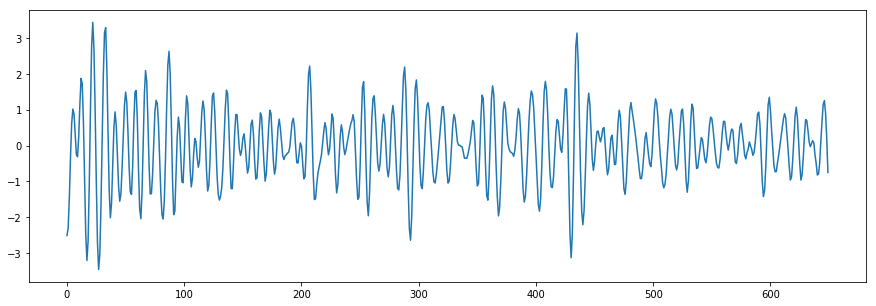

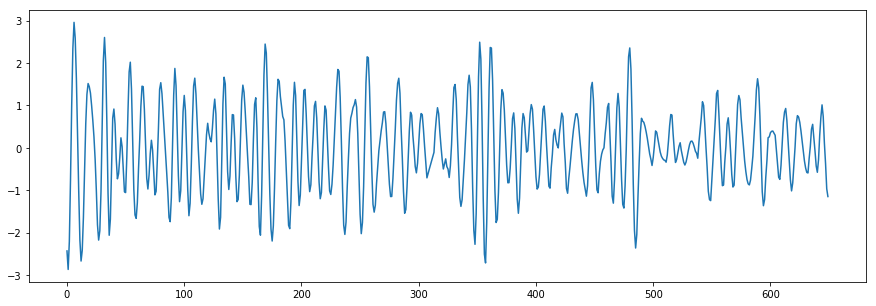

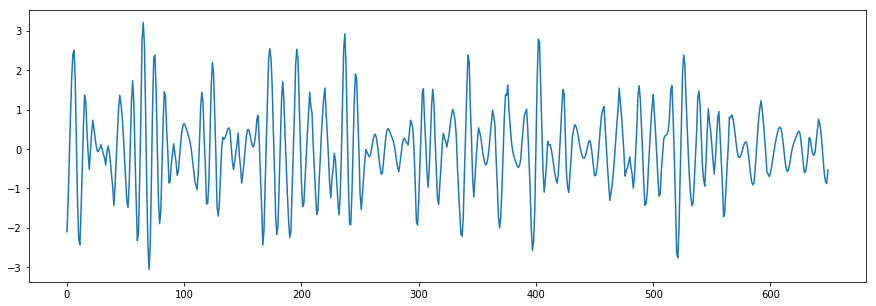

In [16]:
line = decimate(data[:, 0], dec)
for i in range(3):
    plt.figure(figsize=(15, 5))
    plt.plot(standardize(line[i*chunk_size:(i+1)*chunk_size]))
    plt.show()

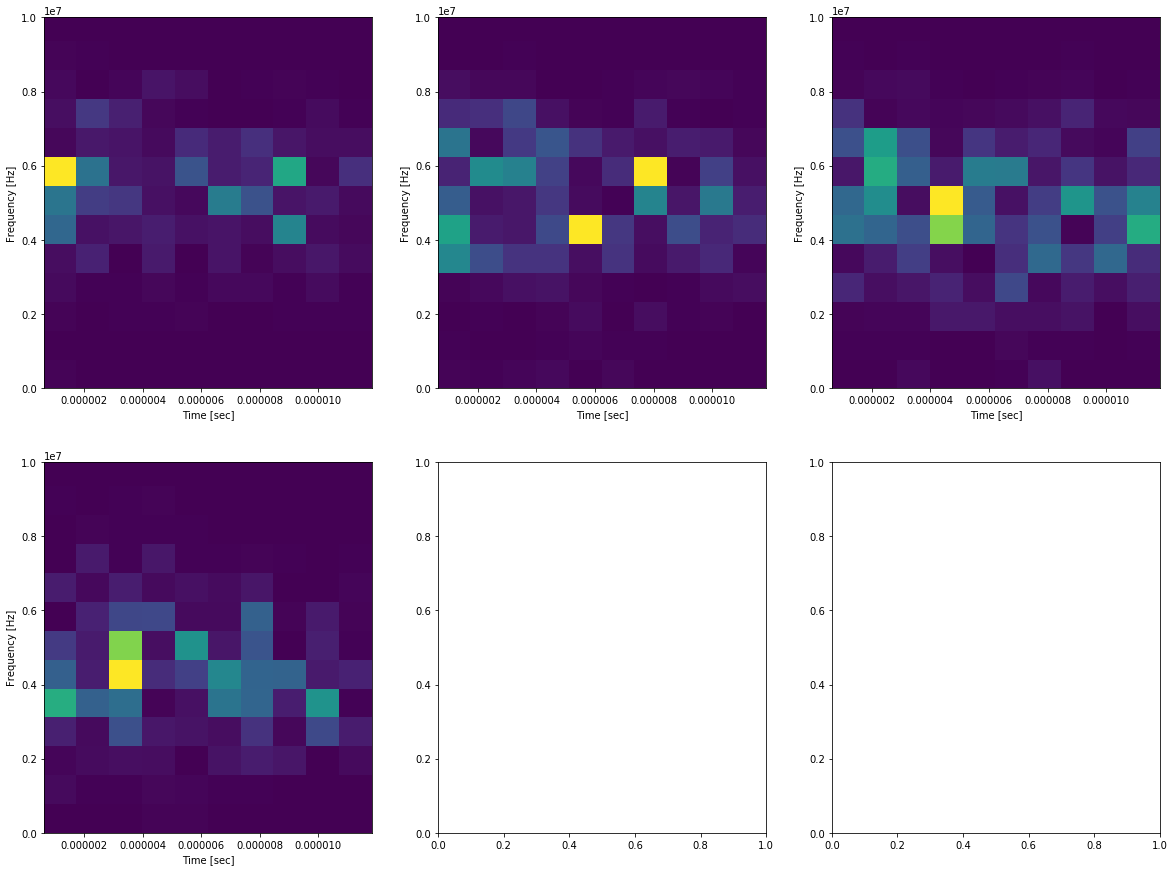

In [17]:
vis_examples = examples[:4]
fig, axes = plt.subplots((vis_examples.shape[0]-1)//3+1, 3)
fig.set_size_inches((20, 15))
for i, chunk in enumerate(vis_examples):
    f, t, Sxx = signal.spectrogram(chunk, fs=FS, nperseg=64)
    ax = axes.flatten()[i]
    ax.pcolormesh(t, f, Sxx)
    ax.set_ylabel('Frequency [Hz]')
    ax.set_ylim([0, 1e7])
    ax.set_xlabel('Time [sec]')
plt.show()

In [18]:
model_id = 0

model = keras.models.load_model('result/model%d.h5' % model_id)
model.summary()

x_test = examples[0:24, :]

predicted_values = model.predict(x_test).squeeze().tolist()
# true_values = y_test
result_df = pd.DataFrame.from_dict({
    "predicted" : predicted_values,
#     "diff" : np.abs(np.array(predicted_values)-np.array(true_values))
})
style_maximizing_table(result_df)

OSError: Unable to open file (unable to open file: name = 'result/model0.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
predicted_values = model.predict(examples).squeeze().tolist()
print("Mean: %.4f" % np.mean(np.abs(np.array(predicted_values)-true_att)))
print("Std: %.4f" % np.std(np.abs(np.array(predicted_values)-true_att)))

In [ ]:
predicted_values = model.predict(examples).squeeze().tolist()
print("Mean: %.4f" % np.mean(predicted_values))
print("Std: %.4f" % np.std(predicted_values))